In [1]:
import numpy as np
from scipy import stats

In [2]:
data = np.random.normal(loc=0, scale=1, size=100)

/tmp/ipykernel_41377/2174721.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


<Axes: ylabel='Density'>

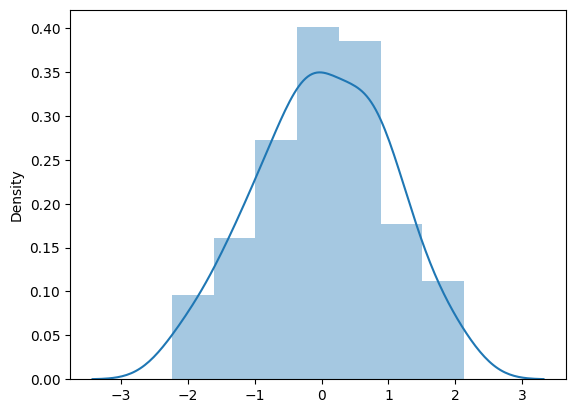

In [4]:
import seaborn as sns
sns.distplot(data)


In [5]:
stat, p = stats.shapiro(data)
print('Statistic = %.3f, p-value = %.3f' % (stat, p))

Statistic = 0.990, p-value = 0.643


In [6]:
result = stats.anderson(data)
print('Statistic = %.3f' % result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Result statistic %.3f < %.3f: data are normal (fail to reject H0)' % (result.statistic, cv))
    else:
        print('Result statistic %.3f > %.3f: data are normal (fail to reject H0)' % (result.statistic, cv))

Statistic = 0.215
Result statistic 0.215 < 0.555: data are normal (fail to reject H0)
Result statistic 0.215 < 0.632: data are normal (fail to reject H0)
Result statistic 0.215 < 0.759: data are normal (fail to reject H0)
Result statistic 0.215 < 0.885: data are normal (fail to reject H0)
Result statistic 0.215 < 1.053: data are normal (fail to reject H0)


In [9]:
# Application for Fisher's iris dataset
from scipy.stats import shapiro
from sklearn.datasets import load_iris

ModuleNotFoundError: No module named 'sklearn'

In [8]:
iris = load_iris()
data = iris.data

NameError: name 'load_iris' is not defined

In [8]:
sepal_length = data[:,0]
sepal_widht = data[:,1]
petal_length = data[:,2]
petal_width = data[:,3]

In [ ]:
sns.distplot(sepal_length)

In [ ]:
sns.distplot(sepal_widht)

In [ ]:
sns.distplot(petal_length)

In [ ]:
sns.distplot(petal_width)

In [17]:
stat1, p1 = shapiro(sepal_length)
print('Statistic1 = %.3f, p-value = %.3f' % (stat1, p1))
stat2, p2 = shapiro(sepal_widht)
print('Statistic2 = %.3f, p-value = %.3f' % (stat2, p2))
stat3, p3 = shapiro(petal_length)
print('Statistic3 = %.3f, p-value = %.3f' % (stat3, p3))
stat4, p4 = shapiro(petal_width)
print('Statistic4 = %.3f, p-value = %.3f' % (stat4, p4))

Statistic1 = 0.976, p-value = 0.010
Statistic2 = 0.985, p-value = 0.101
Statistic3 = 0.876, p-value = 0.000
Statistic4 = 0.902, p-value = 0.000


In [18]:
################################################################################
# Použití bayesovckých kritérií pro ověření hypotézy o normalitě rozdělení dat
#1.  Importování potřebných knihoven:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
data = np.random.normal(loc=0, scale=1, size=100)

In [20]:
# Bayesovský informační kritérium (BIC)
n = len(data)
k = 2  # Počet parametrů rozdělení - střední hodnota a směrodatná odchylka
log_likelihood = np.sum(stats.norm.logpdf(data, np.mean(data), np.std(data)))
bic = -2 * log_likelihood + k * np.log(n)


In [ ]:
print('BIC = %.3f' % bic)


In [22]:
# Comparing two distributions
# generate two random samples from normal distributions
np.random.seed(42)
sample1 = np.random.normal(0, 1, size=100)
sample2 = np.random.normal(1, 1, size=100)

In [ ]:
# plot histograms of the two samples
plt.hist(sample1, alpha=0.5, label='Sample 1')
plt.hist(sample2, alpha=0.5, label='Sample 2')
plt.legend()
plt.show()

In [24]:
# Bayesovský informační kritérium (BIC)
n1 = len(sample1)
k = 2  # Počet parametrů rozdělení - střední hodnota a směrodatná odchylka
log_likelihood1 = np.sum(stats.norm.logpdf(sample1, np.mean(sample1), np.std(sample1)))
bic1 = -2 * log_likelihood1 + k * np.log(n1)

n2 = len(sample2)
k = 2  # Počet parametrů rozdělení - střední hodnota a směrodatná odchylka
log_likelihood2 = np.sum(stats.norm.logpdf(sample2, np.mean(sample2), np.std(sample2)))
bic2 = -2 * log_likelihood2 + k * np.log(n2)


In [ ]:
print('BIC1 = %.3f' % bic1)
print('BIC2 = %.3f' % bic2)
